## Logisitc Classification Project
In this personal project, we are going to use a dataset that contains loan details for those people who have applied for loans. This dataset has 14 columns, with the last column as the label if wether or not a sample applicant got approved or not.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Understand Your Data
- Define the Objective:
    - Clearly identify the problem you're solving (classification, regression, etc.).
    - Understand the type of data you have (structured, unstructured, images, text, etc.).

- Gather the Data:
    - Collect data from reliable sources.
    - Check for legal and ethical issues like copyright and privacy compliance.

- Explore the Data:
    - Understand the structure, data types, and volume.
    - Summarize with descriptive statistics (mean, median, mode, etc.).
    - Visualize the Data:

Use plots (e.g., histograms, scatter plots) to understand distributions, relationships, and patterns.

In [2]:
dataset = pd.read_csv('../../data/loan_data.csv')
df = pd.DataFrame(dataset)

Its importan to have an idea as to how our data looks like before we do any type of manipulation. In here, we take a peek at the first five rows of our data and use the describe() function to have a basic statistical overview of the different columns.

In [3]:
dataset.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
dataset.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## Visualize Data
This code snippet generates count plots to visualize the relationship between categorical features and the target variable, loan_status.

It defines a function create_countplots for creating multiple count plots efficiently.  The function takes the data, a list of columns to plot, the hue (used for grouping), and the figure size as input. It then iterates through the specified columns, creating a count plot for each, setting appropriate labels and titles.

With the aid of this visualization, we can already some patterns in the data.

In [5]:
def create_countplots(data, columns, hue, figsize=(16, 6)):
    num_plots = len(columns)
    fig, axes = plt.subplots(1, num_plots, figsize=figsize)
    
    for i, column in enumerate(columns):
        sns.countplot(data=data, x=column, hue=hue, ax=axes[i])
        axes[i].set_xlabel(column.replace('_', ' ').title())
        axes[i].set_ylabel('Count')
        axes[i].set_title(f'{column.replace("_", " ").title()} by {hue.replace("_", " ").title()}')
    
    plt.tight_layout()
    plt.show()

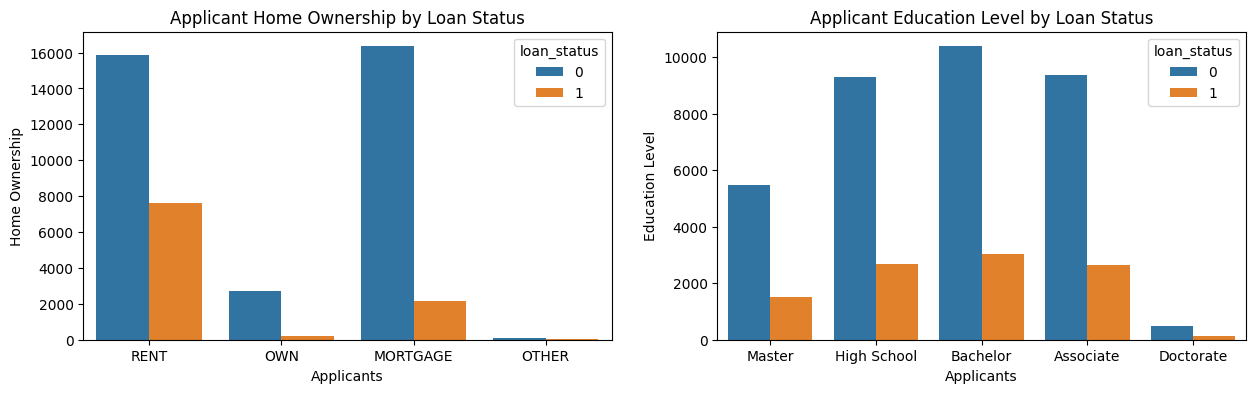

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

sns.countplot(data=dataset, x='person_home_ownership', hue='loan_status', ax=axes[0])
axes[0].set_xlabel('Applicants')
axes[0].set_ylabel('Home Ownership')
axes[0].set_title('Applicant Home Ownership by Loan Status')

sns.countplot(data=dataset, x='person_education', hue='loan_status', ax=axes[1])
axes[1].set_xlabel('Applicants')
axes[1].set_ylabel('Education Level')
axes[1].set_title('Applicant Education Level by Loan Status')
plt.show()

## Identify Missing Values
In here, we try to determine if our dataset has any null values or columns/rows that have empty values. Certain machine learning models are sensitive to null values and therefore its important to anticipate this early.

Luckily, the dataset we have doesn't have null values and so we can proceed to feature engineering directly.

In [7]:
dataset.columns[dataset.isnull().any()]    # Selects the column names where there is null


Index([], dtype='object')

## Feature Engineering
### Scaling & Normalization
Standardization is a crucial preprocessing step, especially for algorithms sensitive to feature scaling (like K-Nearest Neighbors, Support Vector Machines, etc.).  It transforms the numerical features to have zero mean and unit variance.

In [9]:
numerical_columns = df.drop(columns=['loan_status']).select_dtypes(include=['number']).columns

standard_scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# View the scaled dataframe
print(df_scaled.head())

   person_age person_gender person_education  person_income  person_emp_exp  \
0   -0.953538        female           Master      -0.104090       -0.892284   
1   -1.118963        female      High School      -0.846005       -0.892284   
2   -0.457264        female      High School      -0.844065       -0.397517   
3   -0.788113        female         Bachelor      -0.007039       -0.892284   
4   -0.622689          male           Master      -0.176371       -0.727362   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT   4.024953    PERSONAL       1.683039   
1                   OWN  -1.359209   EDUCATION       0.044782   
2              MORTGAGE  -0.646600     MEDICAL       0.625557   
3                  RENT   4.024953     MEDICAL       1.417829   
4                  RENT   4.024953     MEDICAL       1.095549   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0             4.016394                   -0.739109     -1.419814  

### One-Hot Encoding
Some parts of our features (columns) are not necessarily in number format. However, we still want the option to be able to use them. With that, we'll use OneHotEncoder to do one hot encoding to our data.
- One Hot Encoding converts our categorical columns into numerical by creating new columns and setting the correct column associated with the data sample into 1.

In [10]:
from sklearn.preprocessing import OneHotEncoder

features = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

encoder = OneHotEncoder(sparse_output=False)
one_hot_data = encoder.fit_transform(df_scaled[features])

df_onehot = pd.DataFrame(one_hot_data, columns=encoder.get_feature_names_out(features))
df_onehot.index = df_scaled.index
df_scaled_onehot = pd.concat([df_scaled.drop(features, axis=1), df_onehot], axis=1)

df_scaled_onehot.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_female,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,-0.953538,-0.104090,-0.892284,4.024953,1.683039,4.016394,-0.739109,-1.419814,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.118963,-0.846005,-0.892284,-1.359209,0.044782,-0.684829,-0.996863,-2.549975,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.457264,-0.844065,-0.397517,-0.646600,0.625557,3.443074,-0.739109,0.047412,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.788113,-0.007039,-0.892284,4.024953,1.417829,3.443074,-0.996863,0.840507,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.622689,-0.176371,-0.727362,4.024953,1.095549,4.475050,-0.481354,-0.924130,1,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Mutual Information & Relationships
Mutual Information measures the mutual dependence between two random variables.  In this context, it quantifies how much information the presence or absence of a particular feature provides about the loan status. 

A higher MI score indicates a stronger relationship between the feature and the target variable, meaning the feature is more informative for predicting the loan status.  It essentially measures the reduction in uncertainty about the target variable given the knowledge of the feature variable.

In [11]:
from sklearn.feature_selection import mutual_info_classif

X_mi = df_scaled_onehot.drop(columns=['loan_status'])
y_mi = df_scaled_onehot['loan_status']

mi_scores = mutual_info_classif(X_mi, y_mi, random_state=0)
mi_results = pd.DataFrame({
    'Features': X_mi.columns,
    'MI Score': mi_scores
})
mi_results = mi_results.sort_values(by='MI Score', ascending=False)
print(mi_results)

                              Features  MI Score
26  previous_loan_defaults_on_file_Yes  0.197966
25   previous_loan_defaults_on_file_No  0.196373
1                        person_income  0.091447
5                  loan_percent_income  0.080638
4                        loan_int_rate  0.070835
18          person_home_ownership_RENT  0.037540
15      person_home_ownership_MORTGAGE  0.025557
3                            loan_amnt  0.017767
17           person_home_ownership_OWN  0.006747
9                   person_gender_male  0.006666
24                 loan_intent_VENTURE  0.004881
22                 loan_intent_MEDICAL  0.004432
19       loan_intent_DEBTCONSOLIDATION  0.004216
20               loan_intent_EDUCATION  0.003593
10          person_education_Associate  0.003412
0                           person_age  0.002966
21         loan_intent_HOMEIMPROVEMENT  0.001984
7                         credit_score  0.000685
12          person_education_Doctorate  0.000318
6           cb_perso

## Logistic Regression
Logistic Regression is a linear model used for binary classification tasks.  It predicts the probability of a data point belonging to a certain category (e.g., yes/no, 0/1).  

Instead of directly outputting a class, it outputs a probability between 0 and 1, which is then used to make a classification decision based on a chosen threshold.  Despite its name, it's a classification algorithm, not a regression algorithm.

### Splitting the data

Splitting our dataset is a good practice to do, especially in data science tasks, as it can help us evaluate the performance of our machine learning models on unseen data.  This prevents us from overfitting to the training data, where the model performs exceptionally well on the data it has seen but poorly on new, unseen data.  A common approach is to split the data into three sets:

*   **Training set:** This is the largest portion of the data and is used to train the model.  The model learns the patterns and relationships within this data.
*   **Validation set:** This set is used to tune the hyperparameters of the model and to get an initial estimate of its performance.  It helps us choose the best model configuration.
*   **Test set:** This set is held back until the very end of the model development process.  It provides a final, unbiased evaluation of the model's performance on truly unseen data.  This gives us a realistic estimate of how well the model will generalize to new data in the real world.  It's crucial that the test set is only used once, at the very end.

In [12]:
X = df_scaled_onehot.drop(columns=['loan_status'])
y = df_scaled_onehot['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Specifications

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8944444444444445
Precision: 0.7757544224765869
Recall: 0.7417910447761195
F1 Score: 0.7583926754832147
Confusion Matrix:
 [[6559  431]
 [ 519 1491]]


## Random Forests
Random Forests are a popular and versatile ensemble learning method used for both classification and regression tasks.  They operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.  The "random" aspect comes from two key elements:

*   **Bagging (Bootstrap Aggregating):** Each tree is trained on a random subset of the training data, sampled with replacement.  This introduces diversity among the trees.
*   **Feature Randomness:** At each node of a tree, the best split is chosen from a random subset of features, rather than considering all possible features. This further decorrelates the trees, making the forest more robust and less prone to overfitting.

The combination of these two techniques makes Random Forests powerful and effective, often achieving high accuracy with minimal hyperparameter tuning. They are also relatively resistant to outliers and can handle high-dimensional data well.

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.929
Precision: 0.8951008645533142
Recall: 0.772636815920398
F1 Score: 0.8293724966622162
Confusion Matrix:
 [[6808  182]
 [ 457 1553]]


### Feature Importance

One great thing about Random Forests is that they keep track of the variables that appear to be important in making predictions.  This provides a measure of feature importance, which can be very valuable for understanding the underlying data and the model's behavior.  

Feature importance is typically calculated based on how much each feature reduces the impurity (e.g., Gini impurity or entropy for classification, variance for regression) across all the trees in the forest.  Features that are used more frequently for splits, especially at higher levels of the trees, tend to have higher importance scores.

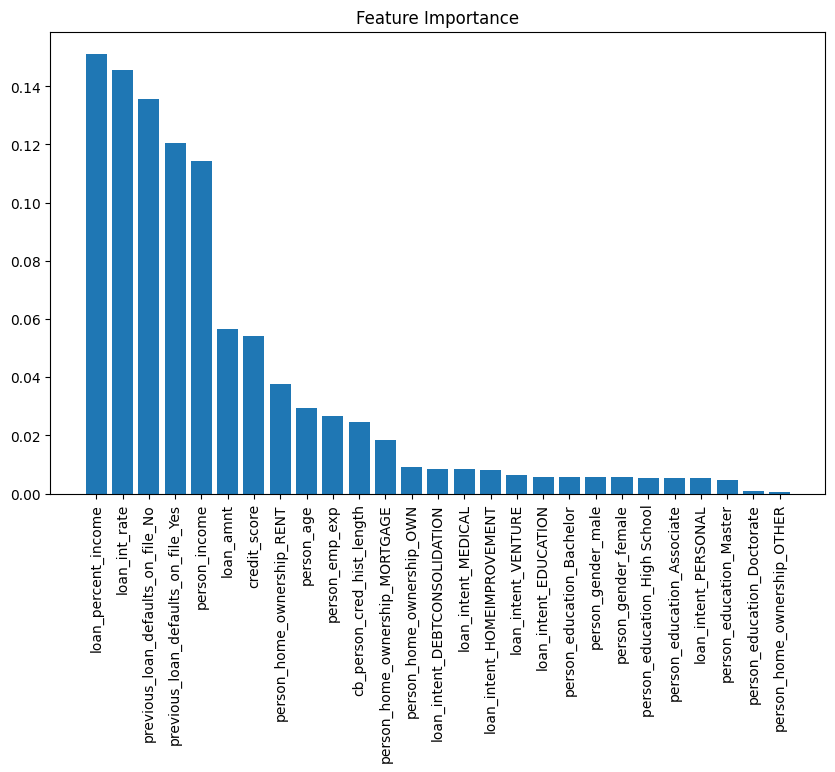

In [17]:
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]


plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X.columns)[sorted_indices], rotation=90)
plt.title("Feature Importance")
plt.show()

## Simple Neural Network
Neural Networks are a class of machine learning models inspired by the structure and function of the human brain.  They consist of interconnected nodes, or neurons, organized in layers.  The basic unit of a neural network is the neuron, which receives input signals, processes them, and sends an output signal.

A neural network generally has these main components:

*   **Neurons (Nodes):** These are the fundamental building blocks. Each neuron receives inputs, applies a weight to each input, sums the weighted inputs, adds a bias, and then applies an activation function.  The activation function introduces non-linearity, which is crucial for the network to learn complex patterns.

*   **Layers:** Neurons are organized into layers:
    *   **Input Layer:** Receives the initial data or features.
    *   **Hidden Layers:** One or more layers between the input and output layers. These layers are where the network learns complex representations of the data.  Deep learning models have many hidden layers.
    *   **Output Layer:** Produces the final prediction or result.

*   **Connections (Weights):**  Connections between neurons have associated weights.  These weights are adjusted during the training process to learn the relationships between the inputs and outputs.

*   **Activation Functions:** These functions introduce non-linearity into the network.  Common activation functions include sigmoid, ReLU (Rectified Linear Unit), and tanh (hyperbolic tangent).  Non-linearity is essential for the network to learn complex patterns that are not linearly separable.

*   **Training (Learning):** The network learns by adjusting the weights based on the difference between its predictions and the actual values. This is typically done using an optimization algorithm like gradient descent.  The goal is to minimize a loss function, which measures the error of the model's predictions.

Neural networks are capable of learning very complex patterns and are used in a wide range of applications, including image recognition, natural language processing, speech recognition, and many more.  They are particularly effective when dealing with large amounts of data.

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset

In [19]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_units, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units)
        self.fc2 = nn.Linear(hidden_units, hidden_units)
        self.fc3 = nn.Linear(hidden_units, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)   # softmax handled by cross entropy loss fn
        return x

this code prepares the data for training a PyTorch model by converting NumPy arrays to tensors, combining them into a dataset, and creating a data loader to efficiently manage the data in batches during the training process.

In [20]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)

X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)


This is the part where we define the **hyperparameters** of the model and the loss function that will be used.

In [21]:
input_size = X_train.shape[1]
hidden_units = 16
num_classes = 2

model = NeuralNetwork(input_size, hidden_units, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

This code trains a machine learning model for 10 epochs.  In each epoch, it iterates through training data in batches, calculates the loss, performs backpropagation to update model weights using an optimizer, and computes training accuracy.  

It then evaluates the model on a separate test set, calculating and storing the test loss and accuracy. Lastly it prints the training and test metrics for each epoch.

Graphing the results makes it easier to intepret.

In [22]:
epochs = 10
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Compute training accuracy
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == batch_y).sum().item()
        total_train += batch_y.size(0)
    
    train_losses.append(running_loss / len(dataloader))
    train_accuracies.append(correct_train / total_train)
    
    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test).item()
        test_losses.append(test_loss)
        
        # Compute test accuracy
        _, test_predicted = torch.max(test_outputs, 1)
        correct_test = (test_predicted == y_test).sum().item()
        test_accuracies.append(correct_test / y_test.size(0))
    
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Test Acc: {test_accuracies[-1]:.4f}")

print("Training complete!")

Epoch [1/10], Train Loss: 0.2377, Test Loss: 0.2088, Train Acc: 0.8889, Test Acc: 0.9046
Epoch [2/10], Train Loss: 0.1981, Test Loss: 0.1979, Train Acc: 0.9106, Test Acc: 0.9133
Epoch [3/10], Train Loss: 0.1903, Test Loss: 0.1925, Train Acc: 0.9140, Test Acc: 0.9136
Epoch [4/10], Train Loss: 0.1864, Test Loss: 0.1864, Train Acc: 0.9156, Test Acc: 0.9183
Epoch [5/10], Train Loss: 0.1832, Test Loss: 0.1874, Train Acc: 0.9168, Test Acc: 0.9153
Epoch [6/10], Train Loss: 0.1805, Test Loss: 0.1846, Train Acc: 0.9181, Test Acc: 0.9166
Epoch [7/10], Train Loss: 0.1793, Test Loss: 0.1829, Train Acc: 0.9194, Test Acc: 0.9172
Epoch [8/10], Train Loss: 0.1775, Test Loss: 0.1866, Train Acc: 0.9202, Test Acc: 0.9182
Epoch [9/10], Train Loss: 0.1766, Test Loss: 0.1827, Train Acc: 0.9201, Test Acc: 0.9177
Epoch [10/10], Train Loss: 0.1756, Test Loss: 0.1848, Train Acc: 0.9210, Test Acc: 0.9180
Training complete!


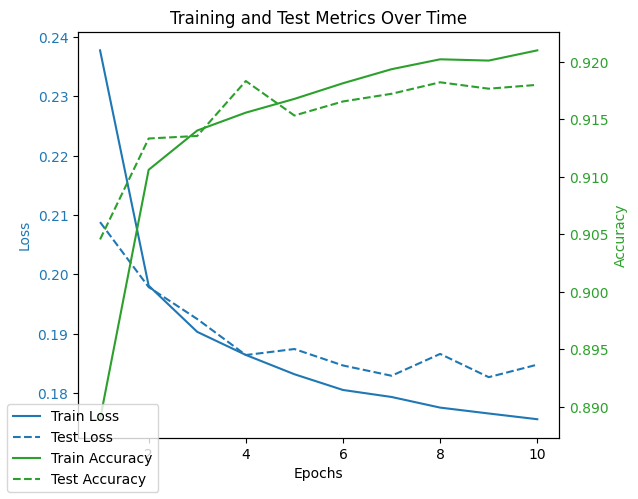

In [23]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(range(1, epochs + 1), train_losses, label='Train Loss', color='tab:blue')
ax1.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='dashed', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:green')
ax2.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy', color='tab:green')
ax2.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy', linestyle='dashed', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('Training and Test Metrics Over Time')
fig.legend(loc='lower left')
plt.show()

In [26]:
final_train_acc = train_accuracies[-1]
final_test_acc = test_accuracies[-1]
print(f"Final Train Accuracy: {final_train_acc:.4f}")
print(f"Final Test Accuracy: {final_test_acc:.4f}")

Final Train Accuracy: 0.9210
Final Test Accuracy: 0.9180
